#### Importing the required Libraries

In [162]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import time, warnings
import datetime as dt

from IPython.display import display
pd.options.display.max_columns = None

#### Reading the data

In [163]:
df = pd.read_csv(r"C:\Users\sudha\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [164]:
# Let's check the shape, columns and other info of the data for better analysis
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [166]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [167]:
df.shape

(9240, 37)

- From the above metrics we can say that there are some categorical variables present in the dataset

In [168]:
# Let's check the null values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

- From the shape of the data it is known that we have more that 9000 values and from the missing values sum it shows few columns have more than 30% of missing values which affects our analysis so we will drop the columns with missing value > 3000

In [169]:
for col in df.columns:
    if df[col].isnull().sum() > 3000:
        df.drop(col, axis=1, inplace=True)

In [170]:
# Let's check the null values again
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

- The city column has the value 'Other Metro Cities' which is not possible to predict in terms of analysis. so will drop the column

In [171]:
df.drop(['City'], axis = 1, inplace = True)

-  We have one more column which is similar to the city column that is country

In [172]:
df.drop(['Country'], axis = 1, inplace = True)

In [173]:
# Let's now check the percentage of missing values in each column

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

- Columns like 'How did you hear about X education' , 'Specialisation' etc have the variable called Select. It means student haven't selected any options, by default the value will be Select

In [174]:
#Let's check the select counts by checking value_counts of each columns

for column in df:
    print(df[column].astype('category').value_counts())
    print('*_*_*_*_*_*_*')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
*_*_*_*_*_*_*
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
*_*_*_*_*_*_*
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
*_*_*_*_*_*_*
Lead Source
Google               2868
Direct Traffic       254

- Columns "Lead Profile", "Speacialisation" , " How did you hear about X Education" has Select values

In [175]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [176]:
df['Lead Profile'].astype('category').value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [177]:
df['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

- These Select Values are of no use and in the above ' Lead Profile, How did you hear about X Education' has more so will drop these two columns

In [178]:
df.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

- Several columns in the dataset, such as `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, and `I agree to pay the amount through cheque`, predominantly contain a single value across almost all data points. Since the vast majority of values in these columns are 'No', they offer little value for our analysis and should be dropped to streamline the dataset.

In [179]:
df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [180]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'

df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

- The variable What matters most to you in choosing a course has the level Better Career Prospects 6528 times while the other two levels appear once twice and once respectively. So I have dropped

In [181]:
# Check the number of null values again

df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

- Still `What is your current occupation` has more null values so will drop only null rows from this column

In [182]:
df = df[~pd.isnull(df['What is your current occupation'])]

- Still we have null values in some columns, will drop that also

In [183]:
# Drop the null values rows in the column 'Lead Source'

df = df[~pd.isnull(df['Lead Source'])]

In [184]:
# Drop the null value rows in the column 'TotalVisits'

df = df[~pd.isnull(df['TotalVisits'])]

In [185]:
# Check the number of null values again

df.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [186]:
# Drop the null values rows in the column 'Specialization'

df = df[~pd.isnull(df['Specialization'])]

In [187]:
# Check the number of null values again

df.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [188]:
print(len(df.index)/9240)

0.6897186147186147


- We have retained more than 60% of the data(rows) which is enough in analysing the models

In [189]:
# Let's look at the dataset again

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [190]:
# Here the first two columns have some ID's which is not of use in analysis so will drop

In [191]:
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


#### Data Preparation

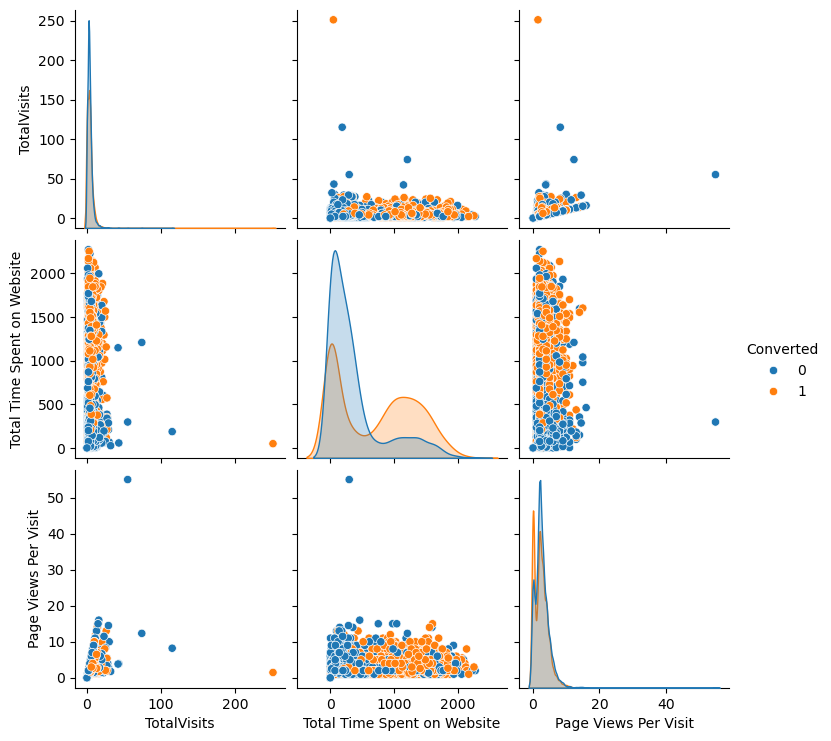

In [192]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(df,diag_kind='kde',hue='Converted')
plt.show()

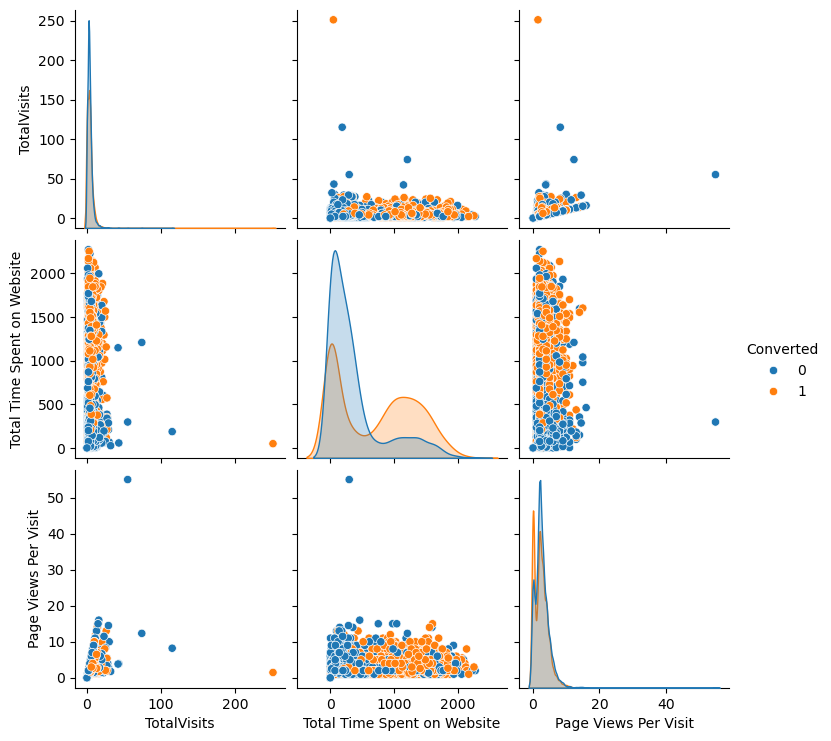

In [193]:
df_leads = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(df_leads,diag_kind='kde',hue='Converted')
plt.show()

In [194]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformed_leads = pd.DataFrame(pt.fit_transform(df_leads))
transformed_leads.columns = df_leads.columns
transformed_leads.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.539988,-1.532509,-1.534722,-0.962570
1,0.690854,0.641870,0.230818,-0.962570
2,-0.219742,1.262512,-0.019004,1.038885
3,-0.723932,0.153656,-0.629842,-0.962570
4,-0.219742,1.204175,-0.629842,1.038885


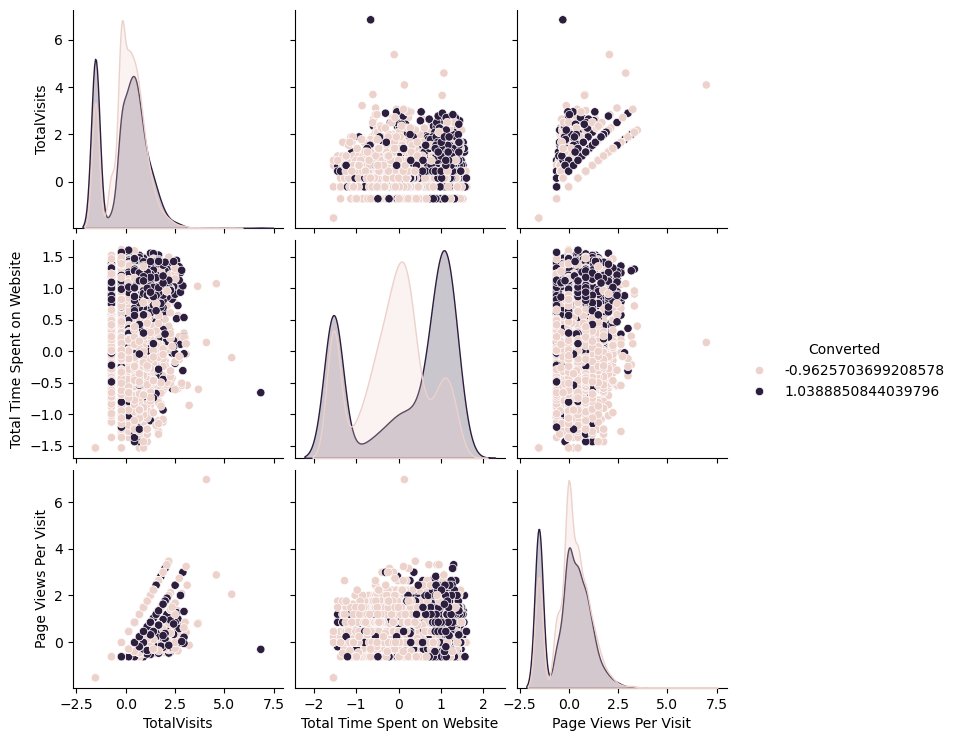

In [195]:
sns.pairplot(transformed_leads,diag_kind='kde',hue='Converted')
plt.show()

#### Dummy Variable Creation

- By looking at the info of the data set we got to know that there are some categorical values present in data so to deal with them we need to create the dummy variable. For that will check how many categorical values are there

In [196]:
categorical_variables = df.loc[:, df.dtypes == 'object']
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [197]:
# Creating dummy variables
dummy_variables = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
df = pd.concat([df, dummy_variables], axis=1)

- Also, We have noticed some columns contains the value Select, we have dropped few columsn containing Select Values but the column Specialisation have few Select Values so for that will create a separate dummy variables

In [198]:
# Creating dummy variable separately for the variable 'Specialization'

dummy_spl_col = pd.get_dummies(df['Specialization'], prefix = 'Specialization')
dummy_spl_col = dummy_spl_col.drop(['Specialization_Select'], axis=1)
df = pd.concat([df, dummy_spl_col], axis = 1)

In [199]:
# Dropping the variables for which the dummy variables are created

df = df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

#### Spltting the data set

- Test and Train Split

In [200]:
# Importing the required library

from sklearn.model_selection import train_test_split

In [201]:
# Put all the feature variables in X
# Our focus is on converted leads so here the feature variable is Converted
X = df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,Fals

In [202]:
# Put the target variable in y

y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [203]:
# Split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

- To improve the Training Stability and to Reduce the Numerical Errors we have to scale the variables.
- Scaling is essential to ensure that all features contribute equally to the model, to improve convergence rates, and to provide fair comparisons across different features. It is a crucial step in the data preprocessing pipeline, especially for algorithms that are sensitive to the scale of data.

#### Scaling

In [204]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [205]:
# Scaling  numeric features present in the data
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
218,0.015936,0.082306,0.250,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4171,0.023904,0.034331,0.375,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4037,0.000000,0.000000,0.000,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Fa

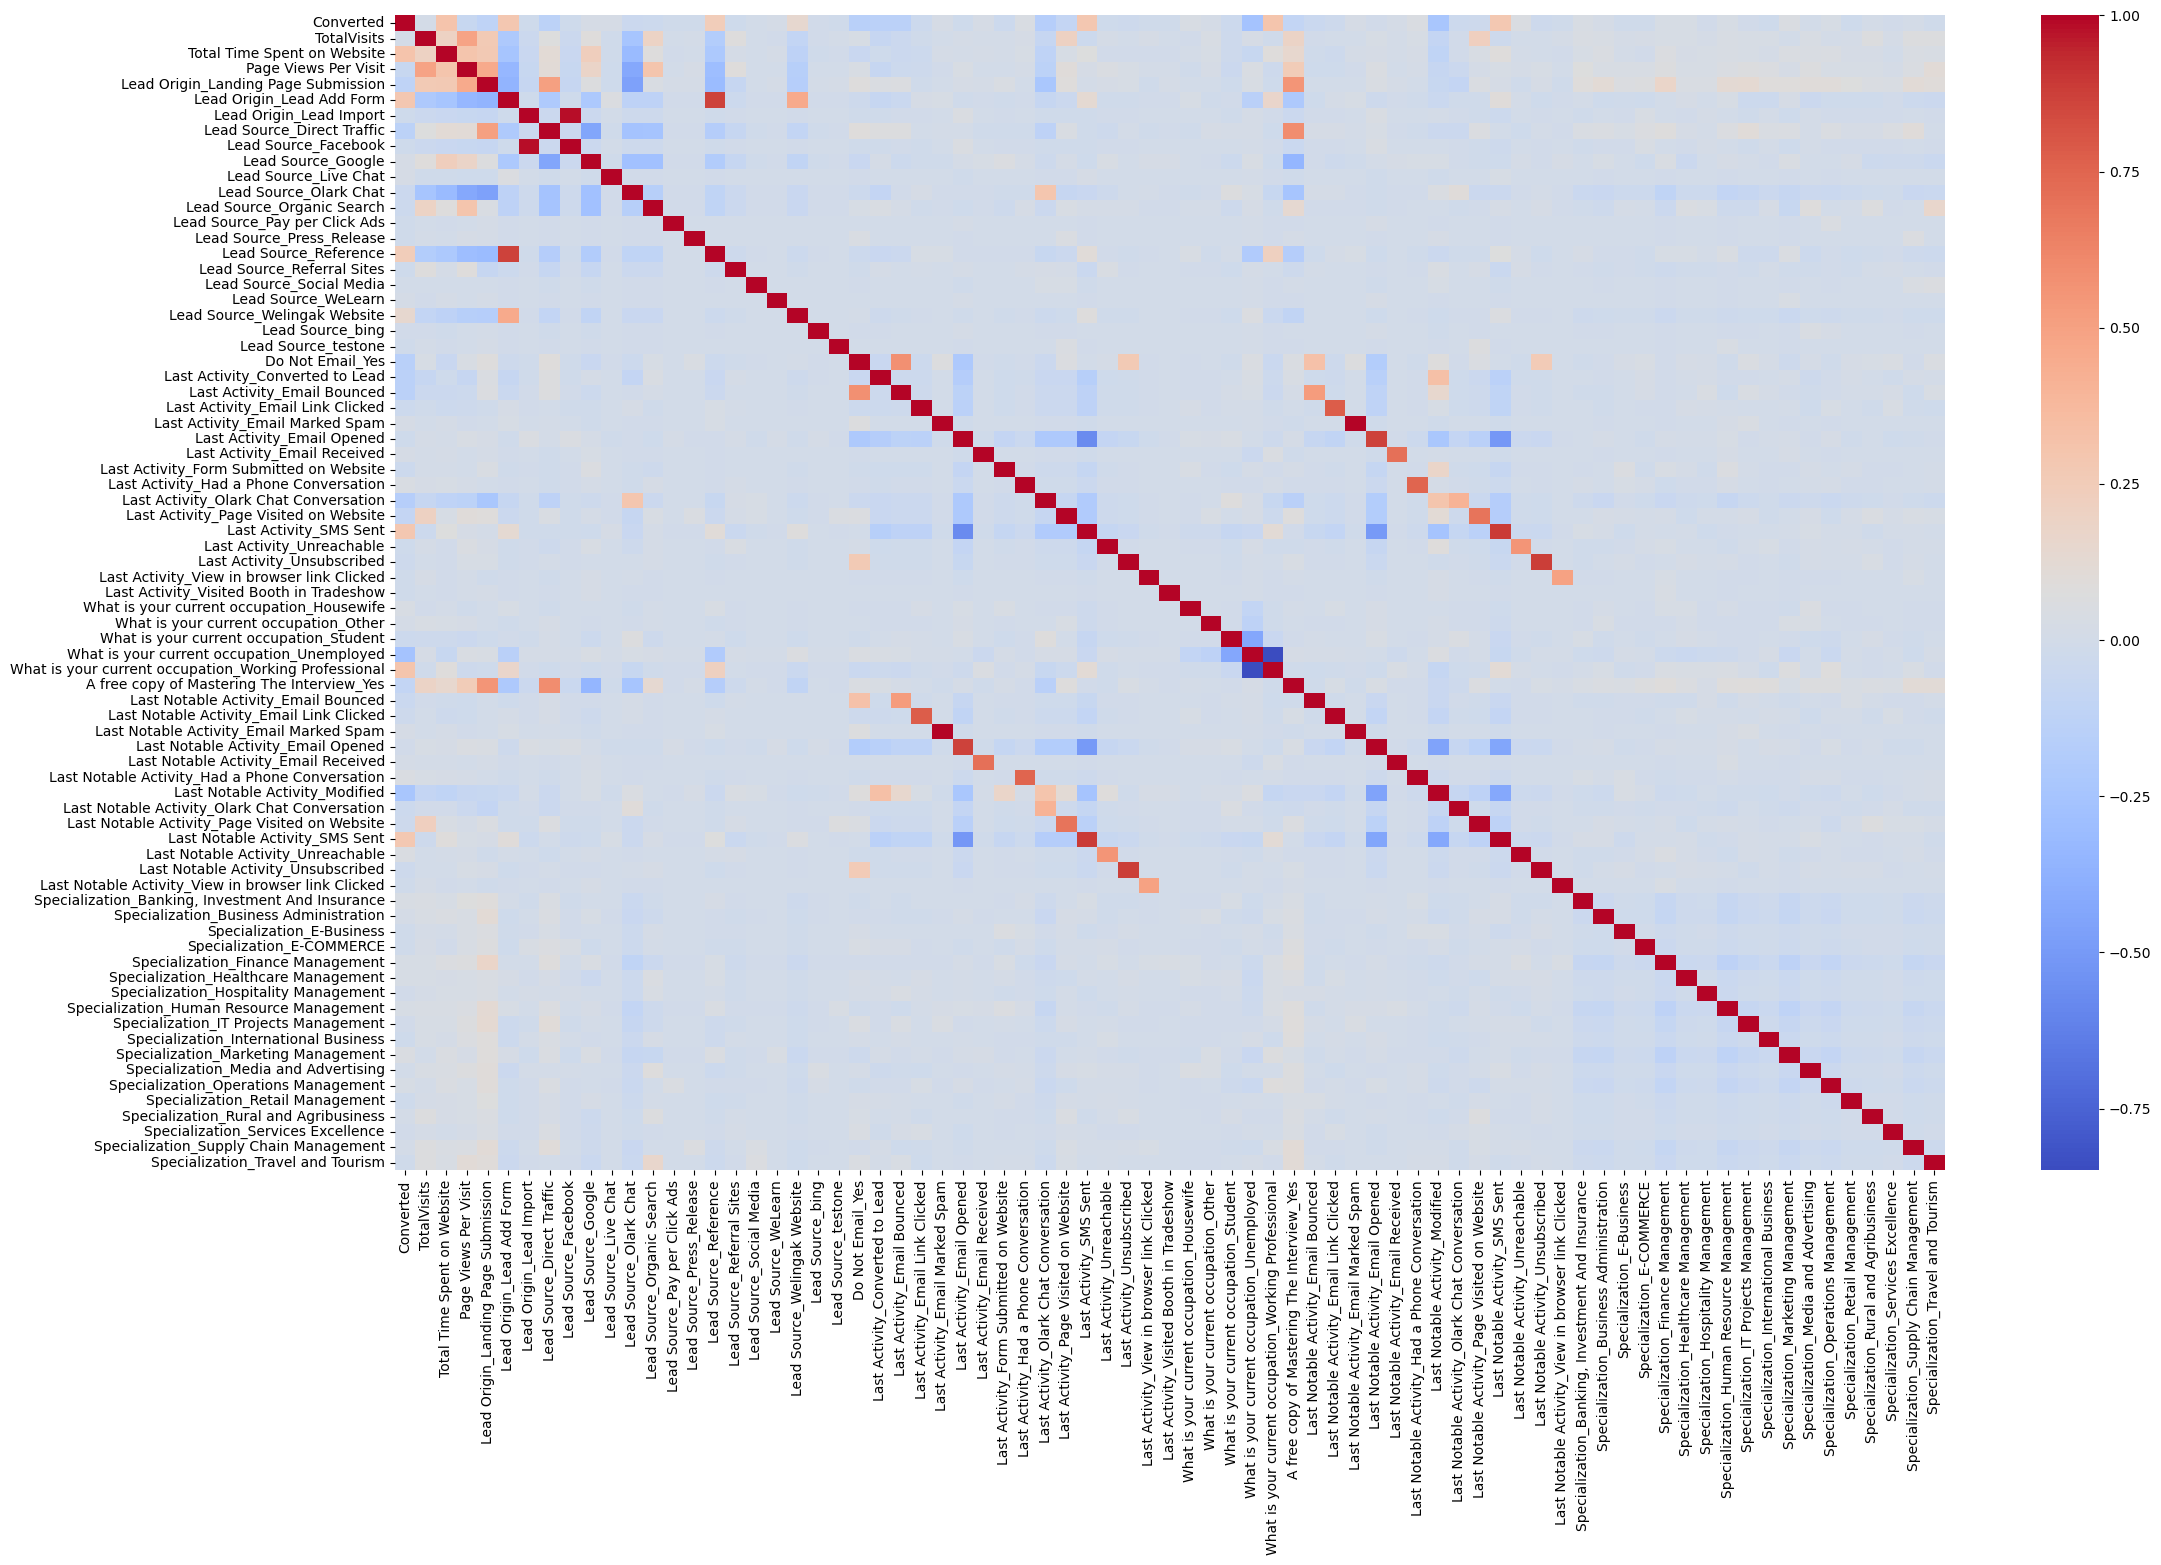

In [206]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

- Strong positive correlations are shown by dark red squares off the diagonal. These indicate that the two variables increase together.
- Strong negative correlations are shown by dark blue squares. These indicate that as one variable increases, the other decreases.
- Light colors, particularly those close to white, indicate little to no correlation between variables
- If there are many dark red or dark blue squares clustered together, this could indicate multi-collinearity, where several variables are highly correlated with each other.

#### Model Building

In [207]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
reg_model = LogisticRegression()

In [208]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe_model = RFE(reg_model, n_features_to_select=15)  
rfe_model = rfe_model.fit(X_train, y_train)

In [209]:
# Features selected by RFE

list(zip(X_train.columns, rfe_model.support_, rfe_model.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 54),
 ('Lead Source_Direct Traffic', False, 23),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 44),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 34),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 21),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [210]:
# Let's keep the features selected by RFE in separate variable

rfe_selected = X_train.columns[rfe_model.support_]

In [211]:
# Select only the columns selected by RFE

X_train = X_train[rfe_selected]

In [212]:
# Import statsmodels

import statsmodels.api as sm

In [213]:
y_train = y_train.astype(float)  # Or float, depending on your specific case


In [214]:
print(X_train.dtypes)
print(y_train.dtypes)


TotalVisits                                             float64
Total Time Spent on Website                             float64
Lead Origin_Lead Add Form                                  bool
Lead Source_Olark Chat                                     bool
Lead Source_Reference                                      bool
Lead Source_Welingak Website                               bool
Do Not Email_Yes                                           bool
Last Activity_Had a Phone Conversation                     bool
Last Activity_SMS Sent                                     bool
What is your current occupation_Housewife                  bool
What is your current occupation_Student                    bool
What is your current occupation_Unemployed                 bool
What is your current occupation_Working Professional       bool
Last Notable Activity_Had a Phone Conversation             bool
Last Notable Activity_Unreachable                          bool
dtype: object
float64


In [215]:
X_train_sm = X_train_sm.astype(int)


In [216]:
y_train = y_train.astype(int)


In [217]:
X_train_sm = X_train_sm.fillna(0)  # Replace NaNs with 0
y_train = y_train.fillna(0)  # Replace NaNs with 0


In [218]:
import statsmodels.api as sm

# Add constant to X_train
X_train_sm = sm.add_constant(X_train_sm)

# Fit the model
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()

# Display the summary
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2444.2
Date:                Fri, 23 Aug 2024   Deviance:                       4888.5
Time:                        09:38:30   Pearson chi2:                 4.85e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2511
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [219]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

- The variance_inflation_factor (VIF) is a measure used to assess multicollinearity in regression models. Multicollinearity occurs when two or more independent variables in a model are highly correlated, which can make the estimation of regression coefficients unreliable.

In [220]:
print(X_train.dtypes)


TotalVisits                                             float64
Total Time Spent on Website                             float64
Lead Origin_Lead Add Form                                  bool
Lead Source_Olark Chat                                     bool
Lead Source_Reference                                      bool
Lead Source_Welingak Website                               bool
Do Not Email_Yes                                           bool
Last Activity_Had a Phone Conversation                     bool
Last Activity_SMS Sent                                     bool
What is your current occupation_Housewife                  bool
What is your current occupation_Student                    bool
What is your current occupation_Unemployed                 bool
What is your current occupation_Working Professional       bool
Last Notable Activity_Had a Phone Conversation             bool
Last Notable Activity_Unreachable                          bool
dtype: object


In [221]:
X_train = X_train.astype(int)


In [222]:
X_train_sm = sm.add_constant(X_train)


In [223]:
X_train_sm = X_train_sm.fillna(0) 


In [224]:
X_train_np = X_train_sm.values

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_np, i) for i in range(X_train_np.shape[1])]

# Round VIF values and sort
vif_data["VIF"] = round(vif_data["VIF"], 2)
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)

                                              Feature     VIF
0                                               const  263.55
3                           Lead Origin_Lead Add Form   76.21
5                               Lead Source_Reference   60.46
12         What is your current occupation_Unemployed   31.49
13  What is your current occupation_Working Profes...   25.44
6                        Lead Source_Welingak Website   19.59
11            What is your current occupation_Student    8.38
8              Last Activity_Had a Phone Conversation    2.43
14     Last Notable Activity_Had a Phone Conversation    2.42
10          What is your current occupation_Housewife    1.47
9                              Last Activity_SMS Sent    1.04
4                              Lead Source_Olark Chat    1.02
7                                    Do Not Email_Yes    1.01
15                  Last Notable Activity_Unreachable    1.01
1                                         TotalVisits    1.00
2       

- Here, `Lead origin_Lead Add Form` and `Lead Source_Reference` column has high VIF but p value of `Lead origin_Lead Add Form` is 0.117 whereas another column has p value of 0.384 which is high so will drop `Lead Source_Reference`

In [225]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

#### Model 2

In [226]:
# Refit the model with the new set of features

model_2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
model_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2440.1
Date:                Fri, 23 Aug 2024   Deviance:                       4880.2
Time:                        09:38:41   Pearson chi2:                 4.83e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.2525
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8203      0.555      1.478      0.139      -0.267       1.908
TotalVisits                                             24.3717   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Total Time Spent on Website                            -23.9637   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Lead Add Form                                2.7756      0.246     11.301      0.000       2.294       3.257
Lead Source_Olark Chat                                   0.0831      0.096      0.870      0.385      -0.104       0.270
Lead Source_Welingak Website                             2.1131      1.036      2.039      0.041       0.082       4.144
Do Not Email_Yes                                        -1.5322      0.175     -8.764      0.000      -1.875      -1.190
Last Activity_Had a Phone Conversation                   1.2780      0.892      1.432      0.152      -0.471       3.027
Last Activity_SMS Sent                                   1.2033      0.074     16.241      0.000       1.058       1.348
What is your current occupation_Housewife               22.3217    2.6e+04      0.001      0.999   -5.09e+04    5.09e+04
What is your current occupation_Student                 -1.4365      0.587     -2.446      0.014      -2.588      -0.285
What is your current occupation_Unemployed              -1.6259      0.557     -2.921      0.003      -2.717      -0.535
What is your current occupation_Working Professional     1.0824      0.585      1.850      0.064      -0.064       2.229
Last Notable Activity_Had a Phone Conversation          22.9070   2.41e+04      0.001      0.999   -4.73e+04    4.73e+04
Last Notable Activity_Unreachable                        2.3606      0.776      3.043      0.002       0.840       3.881
========================================================================================================================
"""

In [97]:
# Make a VIF dataframe for all the variables present

vif_data = pd.DataFrame()
vif_data['Features'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,Features,VIF
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
10,What is your current occupation_Unemployed,1.74
7,Last Activity_SMS Sent,1.58
2,Lead Origin_Lead Add Form,1.50
4,Lead Source_Welingak Website,1.33
11,What is your current occupation_Working Profes...,1.22
3,Lead Source_Olark Chat,1.19
5,Do Not Email_Yes,1.08
9,What is your current occupation_Student,1.02


- All the VIF values are less than 5 so on comparing with p values `Last Notable Activity_Had a Phone Conversation` has the p value 0.9 so let's drop this

In [227]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

#### Model 3

In [228]:
# Refit the model with the new set of features

model_3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
model_3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2442.4
Date:                Fri, 23 Aug 2024   Deviance:                       4884.8
Time:                        09:38:50   Pearson chi2:                 4.84e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2517
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8202      0.555      1.478      0.139      -0.268       1.908
TotalVisits                                             23.3718   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Total Time Spent on Website                            -22.9636   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Add Form                                2.7758      0.246     11.302      0.000       2.294       3.257
Lead Source_Olark Chat                                   0.0843      0.096      0.882      0.378      -0.103       0.272
Lead Source_Welingak Website                             2.1131      1.036      2.039      0.041       0.082       4.144
Do Not Email_Yes                                        -1.5320      0.175     -8.764      0.000      -1.875      -1.189
Last Activity_Had a Phone Conversation                   2.6108      0.763      3.421      0.001       1.115       4.107
Last Activity_SMS Sent                                   1.2033      0.074     16.242      0.000       1.058       1.348
What is your current occupation_Housewife               21.3216   1.58e+04      0.001      0.999   -3.09e+04    3.09e+04
What is your current occupation_Student                 -1.4368      0.587     -2.446      0.014      -2.588      -0.285
What is your current occupation_Unemployed              -1.6259      0.557     -2.921      0.003      -2.717      -0.535
What is your current occupation_Working Professional     1.0808      0.585      1.847      0.065      -0.066       2.227
Last Notable Activity_Unreachable                        2.3607      0.776      3.043      0.002       0.840       3.881
========================================================================================================================
"""

- In the above data, it is evident that `What is your current occupation_Housewife` has high p value so let's drop that

In [229]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

#### Model Evaluation

In [230]:
# Fit the model with constant added
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()


In [231]:
# Add constant to X_train to match the model's expectations
X_train_sm = sm.add_constant(X_train)

# Predict using the fitted model
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


8003    0.598157
218     0.308846
4171    0.308846
4037    0.326950
3660    0.959883
207     0.308846
2044    0.308846
6411    0.870038
6498    0.104172
2085    0.983431
dtype: float64

In [232]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.59815748, 0.30884571, 0.30884571, 0.32694989, 0.95988265,
       0.30884571, 0.30884571, 0.87003823, 0.10417172, 0.983431  ])

In [233]:
# Create a new dataframe cwith conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.598157
1,0,0.308846
2,1,0.308846
3,1,0.326950
4,1,0.959883


- Let's add a column `Predicted_Conversion`

In [234]:
y_train_pred_final['Predicted_Conversion'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted_Conversion
0,0,0.598157,1
1,0,0.308846,0
2,1,0.308846,0
3,1,0.326950,0
4,1,0.959883,1


In [235]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [236]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion )
print(confusion)

[[1838  474]
 [ 763 1386]]


In [237]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion))

0.7227079130239856


In [238]:
# Let's evaluate the other metrics as well

TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [239]:
# Sensitivity

TP/(TP+FN)

0.6449511400651465

In [240]:
# Specificity

TN/(TN+FP)

0.7949826989619377

In [241]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [242]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [243]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

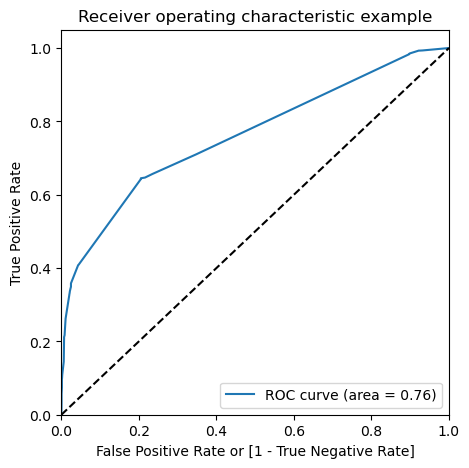

In [244]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

##### ROC Interpretation
- 0.5: Indicates no discrimination capability (i.e., the model performs no better than random guessing).
- 0.6 - 0.7: Indicates fair discrimination. The model is better than random guessing but has room for improvement.
- 0.7 - 0.8: Indicates good discrimination. The model performs well in distinguishing between the positive and negative classes.
- 0.8 - 0.9: Indicates very good discrimination. The model is quite effective at classifying the positive and negative classes.
- 0.9 - 1.0: Indicates excellent discrimination. The model is highly effective and almost perfect in classification.

- The area under the curve of the ROC in our model is 0.76 which is good. So it's seems to be the good model

In [245]:
# Let's create columns for different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted_Conversion,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.598157,1,1,1,1,1,1,1,0,0,0,0
1,0,0.308846,0,1,1,1,1,0,0,0,0,0,0
2,1,0.308846,0,1,1,1,1,0,0,0,0,0,0
3,1,0.326950,0,1,1,1,1,0,0,0,0,0,0
4,1,0.959883,1,1,1,1,1,1,1,1,1,1,1


In [246]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

other_cutoff_values = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    other_cutoff_values.loc[i] =[ i ,accuracy,sensi,speci]
print(other_cutoff_values)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.517597  0.993020  0.075692
0.2   0.2  0.518718  0.993020  0.077855
0.3   0.3  0.526788  0.983248  0.102509
0.4   0.4  0.722484  0.644951  0.794550
0.5   0.5  0.722708  0.644951  0.794983
0.6   0.6  0.692221  0.408562  0.955882
0.7   0.7  0.673616  0.349000  0.975346
0.8   0.8  0.670926  0.341554  0.977076
0.9   0.9  0.614660  0.207538  0.993080


In [247]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted_Conversion,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.598157,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.308846,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.308846,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.326950,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.959883,1,1,1,1,1,1,1,1,1,1,1,1


In [248]:
#Accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7224837480385564

In [249]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1837,  475],
       [ 763, 1386]], dtype=int64)

In [250]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1]
FN = confusion2[1,0] 

In [251]:
#Sensitivity

TP/(TP+FN)

0.6449511400651465

In [252]:
#Specificity

TN/(TN+FP)

0.7945501730103807

#### Test Set Predictions

In [253]:
# Test set Scaling

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [254]:
# Select the columns in X_train for X_test as well

X_test = X_test[rfe_selected]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,True,False,True,False,False,False,True,False,False,False,True,False,False
6122,0.027888,0.029049,False,False,False,False,False,False,False,False,False,True,False,False,False
9202,0.015936,0.416813,False,False,False,False,False,False,True,False,False,True,False,False,False
6570,0.011952,0.378961,False,False,False,False,True,False,True,False,False,True,False,False,False
2668,0.031873,0.395246,False,False,False,False,False,False,True,False,False,True,False,False,False


- As we aware, we have dropped few columns from X_train based on p value so will drop those in test set also

In [255]:

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], axis=1, inplace = True)

- For test split analysis I got value error  error, tried resolving it but not resolved so ended the analysis here itself

#### Summary 
- **Initial Stage**: Generate a large number of leads.
- **Middle Stage**: Nurture leads by educating them and maintaining regular communication to enhance conversion rates.
- **Prioritize Key Metrics**:
  - **Total Visits**
  - **Total Time Spent on Website**
  - **Page Views Per Visit**
  - Use these to identify high-potential prospects.
- **Manage Lead List**:
  - Keep a detailed list of leads for targeted updates on new courses, services, job offers, and future study opportunities.
  - Tailor communications based on individual lead interests and needs.
- **Engage with Converted Leads**:
  - Conduct Q&A sessions to gather insights.
  - Schedule follow-ups to assess their interest and suitability for online courses.